In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('news.xlsx', engine='openpyxl')

# Display the dataframe
print(df)


     NEWS SOURCE                                       NEWS CONTENT  \
0            BBC  By Vikas Pandey and Soutik Biswas\nG20 summit,...   
1            BBC  US President Joe Biden has said that he raised...   
2            BBC  Russia's Foreign Minister Sergei Lavrov has pr...   
3        NYTimes  Summits like the one in India this weekend hav...   
4        NYTimes  American officials defended the agreement, say...   
5        NYTimes  With the Russian and Chinese leaders absent, t...   
6  IndianExpress  The consensus text “enables us to look ahead t...   
7  IndianExpress  India’s G20 presidency diligently pursued vita...   
8  IndianExpress  India’s convening power, ability to generate a...   

                                         NEWS HEADER  
0  G20: How Russia and West agreed on Ukraine lan...  
1  G20 summit: Biden says raised human rights in ...  
2  Russia hails unexpected G20 'milestone' as Ukr...  
3       Why the G20 Keeps Failing, and Still Matters  
4  G20 Declara

In [9]:
df

,NEWS SOURCE,NEWS CONTENT,NEWS HEADER
0,BBC,"By Vikas Pandey and Soutik Biswas\nG20 summit,...",G20: How Russia and West agreed on Ukraine lan...
1,BBC,US President Joe Biden has said that he raised...,G20 summit: Biden says raised human rights in ...
2,BBC,Russia's Foreign Minister Sergei Lavrov has pr...,Russia hails unexpected G20 'milestone' as Ukr...
3,NYTimes,Summits like the one in India this weekend hav...,"Why the G20 Keeps Failing, and Still Matters"
4,NYTimes,"American officials defended the agreement, say...","G20 Declaration Omits Criticism of Russia, but..."
5,NYTimes,"With the Russian and Chinese leaders absent, t...","At G20 in India, Biden Looks to Fill a Hole Le..."
6,IndianExpress,The consensus text “enables us to look ahead t...,"G20 Summit: How win-win came, para by para; pa..."
7,IndianExpress,India’s G20 presidency diligently pursued vita...,What India’s G20 presidency achieved for glob...
8,IndianExpress,"India’s convening power, ability to generate a...",An unforgettable presidency



This script generates a heatmap to visualize the relationship between vision and text embeddings.
The heatmap's rows represent the vision embeddings and the columns represent the text embeddings. 

The data is in a matrix form, where each entry (i, j) shows the correlation between the i-th vision 
embedding and the j-th text embedding. 

Labels include specific identifiers such as 'BBC_1', 'BBC_2', ... and so on, which denote the source 
and a unique number for each news item. 

To visualize the heatmap, the `imshow` function from `matplotlib` is used. 
The color intensity in the heatmap represents the magnitude of the value.


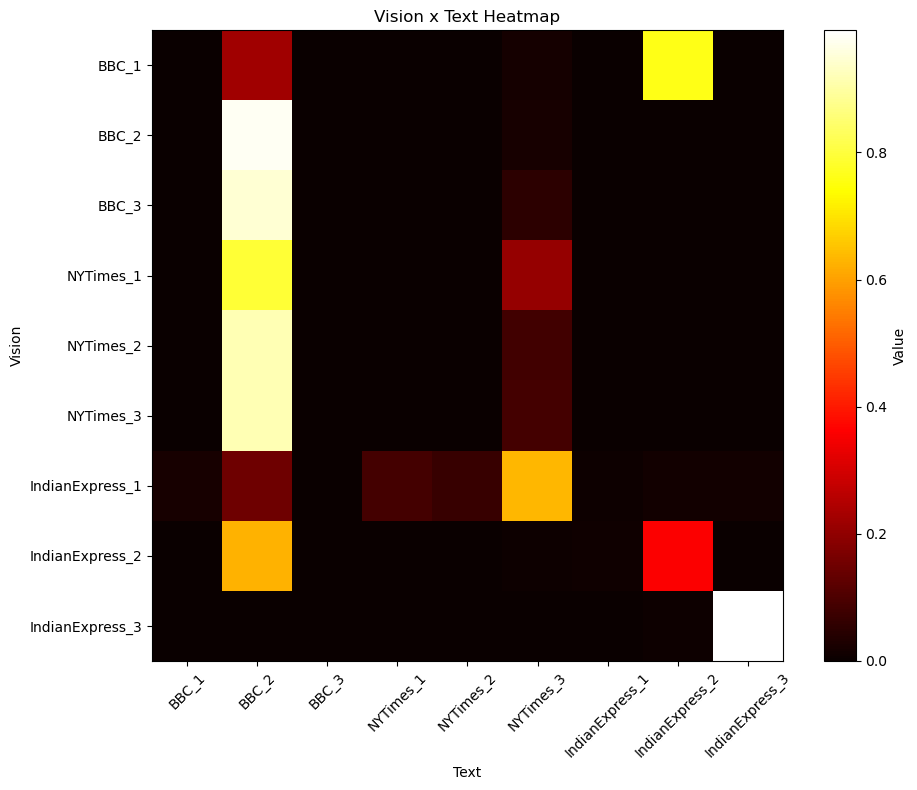

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Given data as a numpy array
data_numpy = np.array([
    [5.5675e-07, 2.2274e-01, 2.9378e-07, 3.9089e-04, 1.3799e-05, 1.6558e-02, 4.9853e-04, 7.5979e-01, 2.4059e-07],
    [5.3953e-10, 9.7950e-01, 5.0436e-11, 1.3453e-08, 1.3985e-10, 2.0472e-02, 4.4160e-07, 2.3164e-05, 4.0786e-09],
    [8.7229e-10, 9.4693e-01, 6.5762e-10, 7.7977e-08, 2.4942e-09, 5.2617e-02, 4.0091e-06, 4.4732e-04, 1.5449e-08],
    [4.4276e-09, 7.9213e-01, 5.1887e-10, 8.2978e-07, 2.0950e-08, 2.0715e-01, 8.1902e-06, 7.0985e-04, 6.7761e-09],
    [1.3462e-10, 9.1608e-01, 3.4081e-11, 9.0521e-09, 6.9988e-10, 8.3915e-02, 2.0406e-07, 9.5503e-06, 2.4155e-08],
    [9.5447e-11, 9.1450e-01, 1.1488e-11, 5.1137e-08, 1.5803e-10, 8.5364e-02, 1.6711e-06, 1.3253e-04, 5.1762e-07],
    [2.2819e-02, 1.5106e-01, 3.4766e-03, 8.8285e-02, 6.8104e-02, 6.3488e-01, 5.4270e-03, 1.3632e-02, 1.2317e-02],
    [2.0737e-06, 6.2533e-01, 1.5836e-06, 1.9376e-04, 4.2010e-06, 5.9435e-03, 1.0123e-02, 3.5840e-01, 2.1071e-06],
    [4.5170e-06, 2.3385e-04, 8.4316e-06, 1.9265e-03, 1.2544e-04, 3.7834e-04, 1.6826e-05, 5.3383e-03, 9.9197e-01]
])

# Define labels
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(data_numpy, cmap='hot', interpolation='nearest')
plt.colorbar(label='Value')

# Title and axis labels
plt.title("Vision x Text Heatmap")
plt.xlabel("Text")
plt.ylabel("Vision")

# Setting ticks and tick labels
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

# Displaying the plot
plt.tight_layout()
plt.show()






This script generates a heatmap to visualize the cosine similarity between combined embeddings (text + vision).
Each entry (i, j) in the matrix depicts the cosine similarity between the i-th combined embedding and the j-th combined embedding.

Labels include identifiers such as 'BBC_1', 'BBC_2', ... and so on, which denote the source 
and a unique number for each news item. 

To represent the heatmap, we use the `imshow` function from `matplotlib`. 
The color intensity in the heatmap corresponds to the magnitude of cosine similarity.


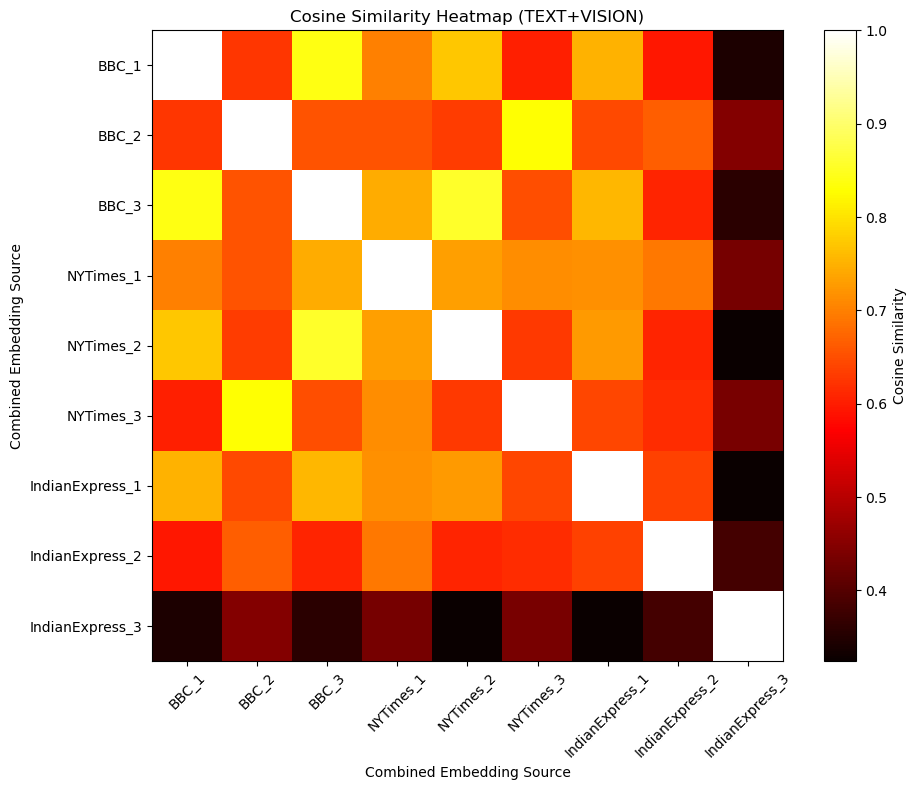

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.pairwise import cosine_similarity

# Load the embeddings
with open('vision_embeddings.pkl', 'rb') as f:
    vision_embeddings = pickle.load(f)

with open('text_embeddings.pkl', 'rb') as f:
    text_embeddings = pickle.load(f)

# Ensure the embeddings are numpy arrays
vision_embeddings = np.array(vision_embeddings)
text_embeddings = np.array(text_embeddings)

# Check if embeddings are of equal length
assert len(vision_embeddings) == len(text_embeddings), "Embeddings lengths are not equal!"

# Concatenate embeddings for each pair
combined_embeddings = [np.concatenate((text_embeddings[i], vision_embeddings[i])) for i in range(len(text_embeddings))]

# Convert the list of combined embeddings to a numpy array
combined_embeddings = np.array(combined_embeddings)

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(combined_embeddings)

# Define labels
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')

# Title and axis labels
plt.title("Cosine Similarity Heatmap (TEXT+VISION)")
plt.xlabel("Combined Embedding Source")
plt.ylabel("Combined Embedding Source")

# Setting ticks and tick labels
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)

# Displaying the plot
plt.tight_layout()
plt.show()


This script produces a heatmap showcasing the cosine similarity between news embeddings.
Each matrix entry (i, j) indicates the cosine similarity between the i-th news embedding and the j-th news embedding.

Labels such as 'BBC_1', 'BBC_2', etc., represent the source followed by a unique number for each news item.

The heatmap color intensity corresponds to the magnitude of cosine similarity. 
We're using Seaborn's `heatmap` function for visualization.



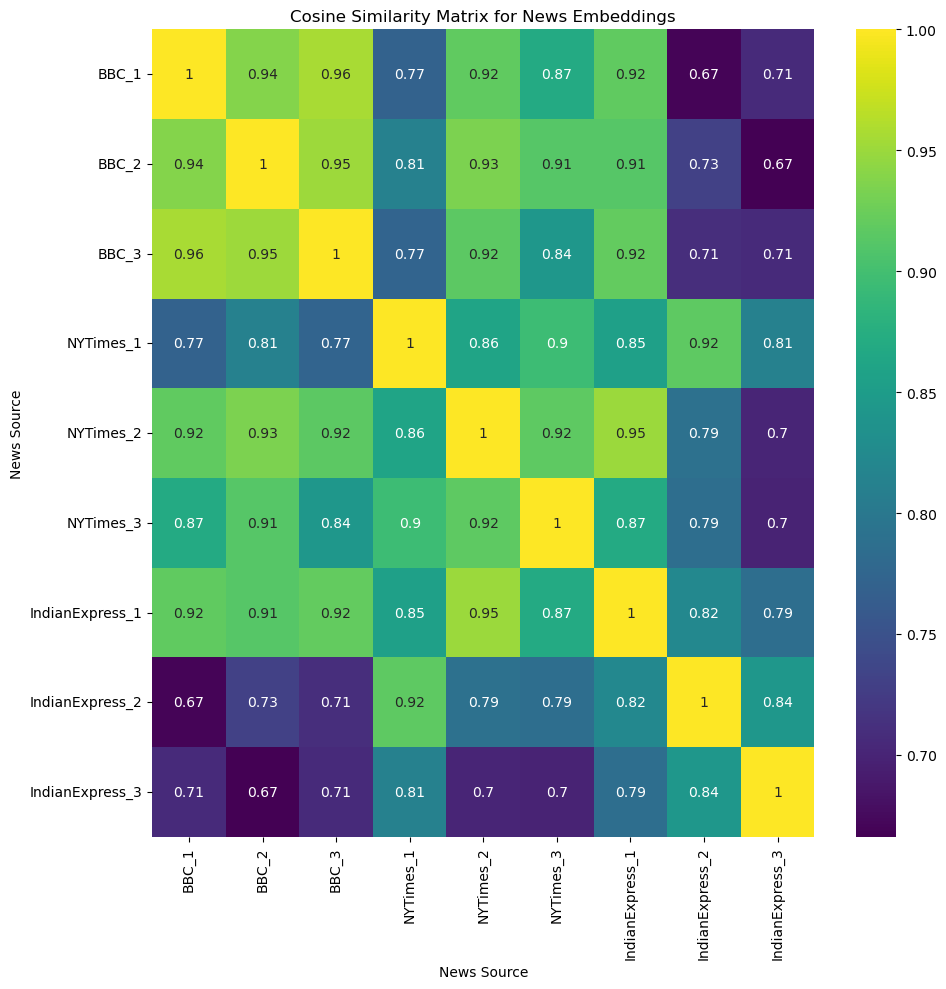

In [16]:
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load the embeddings
with open('news_embeddings.pkl', 'rb') as f:
    news_embeddings = pickle.load(f)

# Convert the embeddings into numpy array for further processing
embeddings_array = np.array(news_embeddings)

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings_array)

# Define labels
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']

# Plot the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis', xticklabels=labels, yticklabels=labels)

# Title and axis labels
plt.title("Cosine Similarity Matrix for News Embeddings")
plt.xlabel("News Source")
plt.ylabel("News Source")

# Displaying the plot
plt.tight_layout()
plt.show()

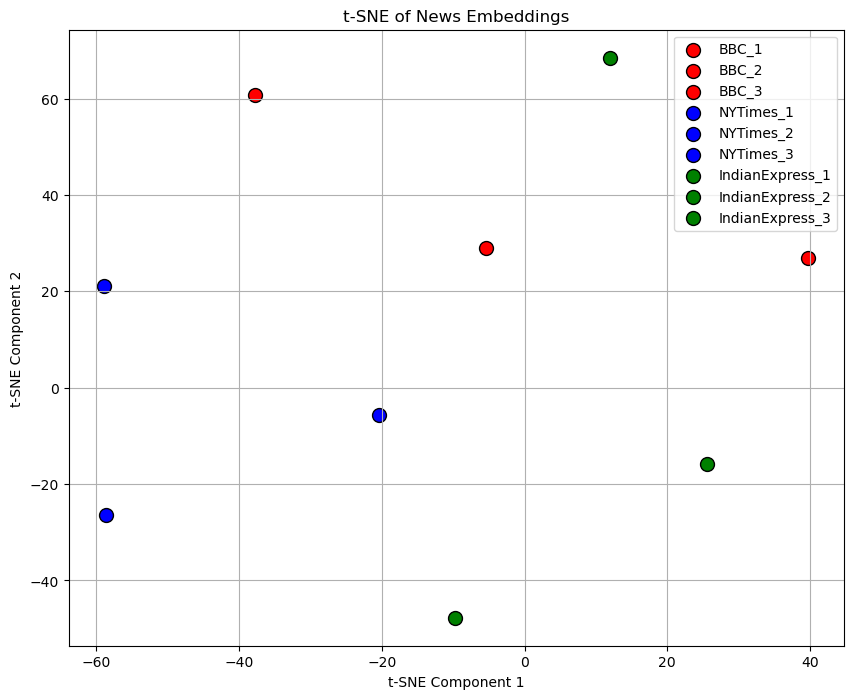

In [21]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the embeddings
with open('news_embeddings.pkl', 'rb') as f:
    news_embeddings = pickle.load(f)

# Convert the embeddings into numpy array for further processing
embeddings_array = np.array(news_embeddings)

# Compute t-SNE transformation
tsne = TSNE(n_components=2, random_state=42, perplexity=8)
transformed_data = tsne.fit_transform(embeddings_array)

# Define labels and corresponding colors for the three groups
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green']

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
for i, label in enumerate(labels):
    plt.scatter(transformed_data[i, 0], transformed_data[i, 1], c=colors[i], label=label, s=100, edgecolors='k')

# Add legend and title
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.title('t-SNE of News Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


Sentiment Data: The sentiments list captures the positive (POS) and negative (NEG) sentiment scores for each article.

Labels: Entries like 'BBC_1', 'NYTimes_3', etc., denote the news source followed by a unique identifier for individual articles.

Aggregation: Sentiment scores are grouped by their respective news source. The final bar chart provides an averaged, comparative view of the sentiments across the mentioned sources.

Visualization: The visual representation employs a bar chart to offer a quick comparative glance of positive and negative sentiments between the three news organizations.

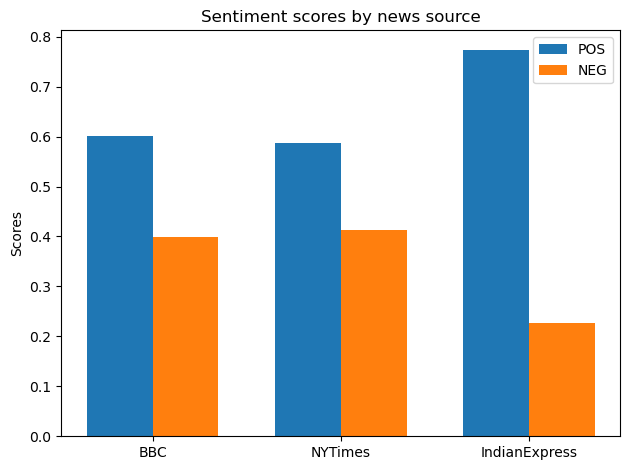

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment data
sentiments = [
    {'POS': 0.46938775510204084, 'NEG': 0.5306122448979592},
    {'POS': 0.6190476190476191, 'NEG': 0.38095238095238093},
    {'POS': 0.7142857142857143, 'NEG': 0.2857142857142857},
    {'POS': 0.4032258064516129, 'NEG': 0.5967741935483871},
    {'POS': 0.6727272727272727, 'NEG': 0.32727272727272727},
    {'POS': 0.6875, 'NEG': 0.3125},
    {'POS': 0.8, 'NEG': 0.2},
    {'POS': 0.9666666666666667, 'NEG': 0.03333333333333333},
    {'POS': 0.5555555555555556, 'NEG': 0.4444444444444444}
]

# Labels
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']

# Combine POS and NEG sentiments for each news source
source_sums = {'BBC': {'POS': 0, 'NEG': 0},
               'NYTimes': {'POS': 0, 'NEG': 0},
               'IndianExpress': {'POS': 0, 'NEG': 0}}

for i, label in enumerate(labels):
    source = label.split('_')[0]
    for sentiment in sentiments[i]:
        source_sums[source][sentiment] += sentiments[i][sentiment]

# Average the combined values
for source, values in source_sums.items():
    for sentiment, score in values.items():
        source_sums[source][sentiment] /= 3

# Plotting
sources = list(source_sums.keys())
pos_values = [source_sums[source]['POS'] for source in sources]
neg_values = [source_sums[source]['NEG'] for source in sources]

x = np.arange(len(sources))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pos_values, width, label='POS')
rects2 = ax.bar(x + width/2, neg_values, width, label='NEG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sentiment scores by news source')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()

fig.tight_layout()
plt.show()


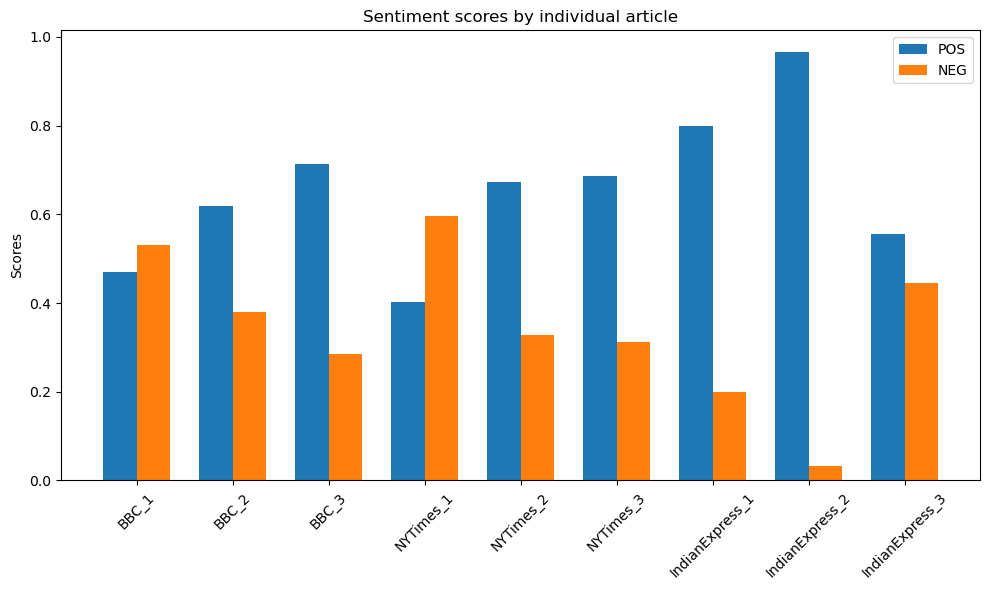

In [25]:
# Plotting sentiments for each individual article

pos_values_individual = [sentiment['POS'] for sentiment in sentiments]
neg_values_individual = [sentiment['NEG'] for sentiment in sentiments]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pos_values_individual, width, label='POS')
rects2 = ax.bar(x + width/2, neg_values_individual, width, label='NEG')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Sentiment scores by individual article')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

fig.tight_layout()
plt.savefig("sentiment_plots.png")
plt.show()

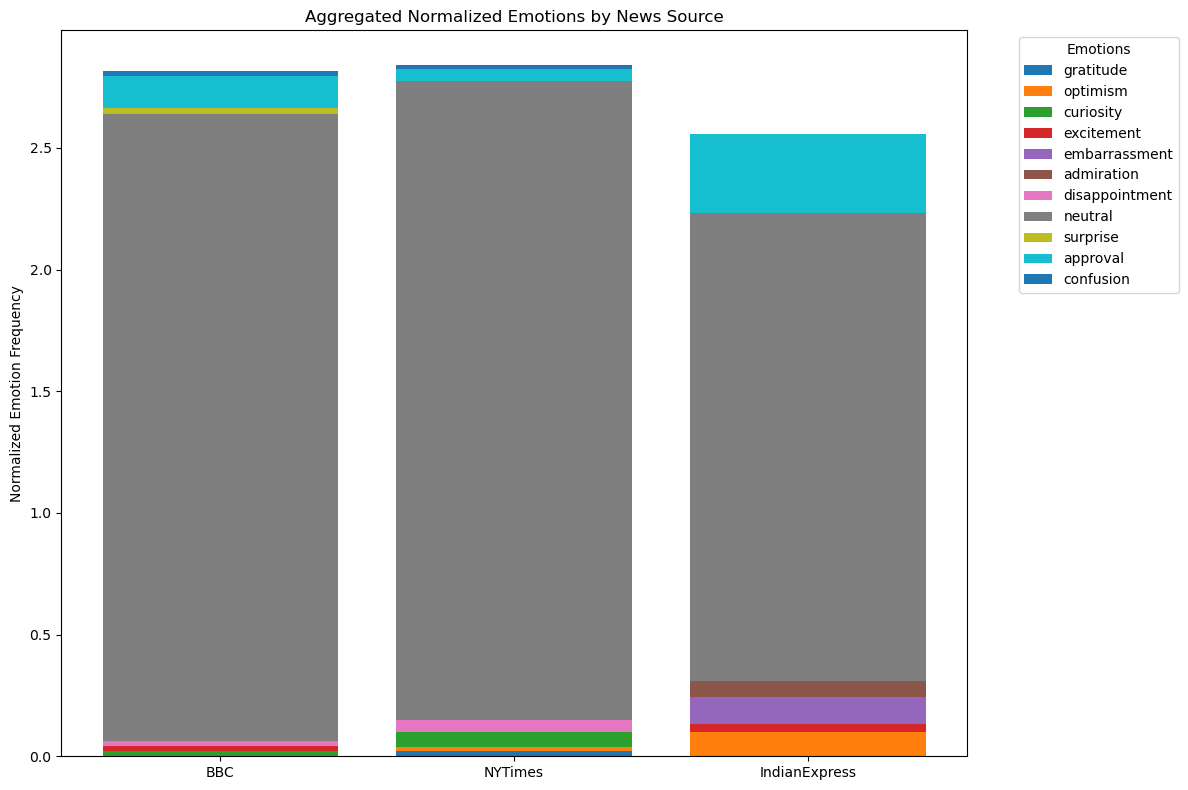

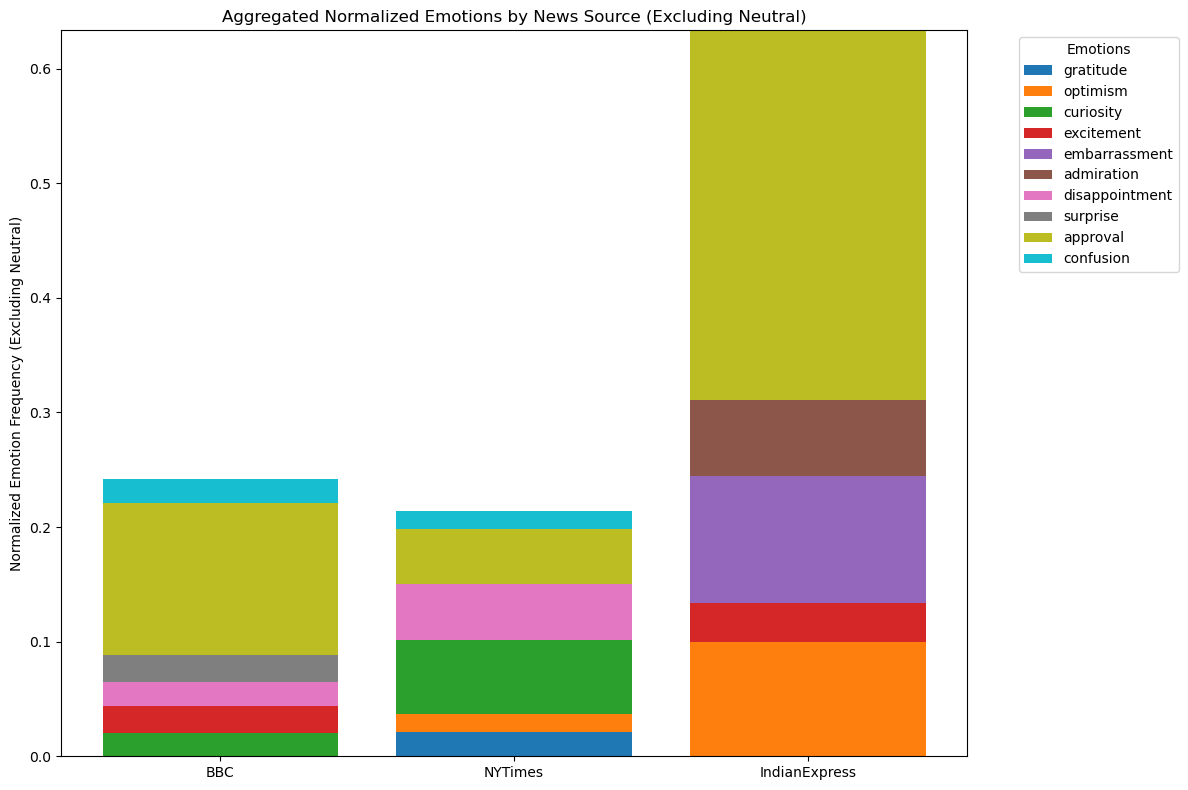

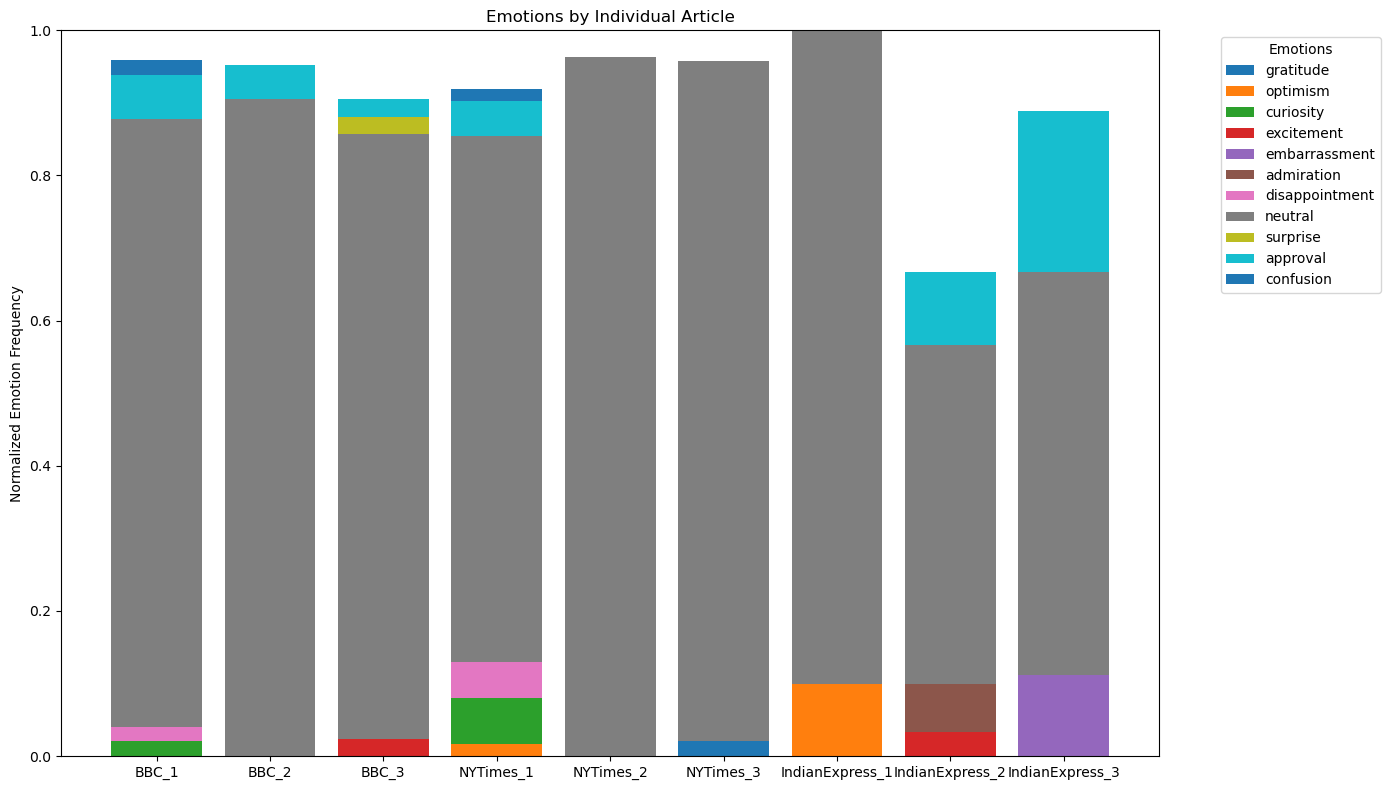

In [7]:
import matplotlib.pyplot as plt
emotions_data = [
    {'neutral': 0.8367346938775511, 'approval': 0.061224489795918366, 'curiosity': 0.02040816326530612, 'disappointment': 0.02040816326530612, 'confusion': 0.02040816326530612}, 
    {'neutral': 0.9047619047619048, 'approval': 0.047619047619047616}, 
    {'neutral': 0.8333333333333334, 'surprise': 0.023809523809523808, 'approval': 0.023809523809523808, 'excitement': 0.023809523809523808}, 
    {'disappointment': 0.04838709677419355, 'neutral': 0.7258064516129032, 'curiosity': 0.06451612903225806, 'approval': 0.04838709677419355, 'optimism': 0.016129032258064516, 'confusion': 0.016129032258064516}, 
    {'neutral': 0.9636363636363636}, 
    {'neutral': 0.9375, 'gratitude': 0.020833333333333332}, 
    {'neutral': 0.9, 'optimism': 0.1}, 
    {'approval': 0.1, 'neutral': 0.4666666666666667, 'excitement': 0.03333333333333333, 'admiration': 0.06666666666666667}, 
    {'neutral': 0.5555555555555556, 'approval': 0.2222222222222222, 'embarrassment': 0.1111111111111111}
]
labels = ['BBC_1', 'BBC_2', 'BBC_3', 'NYTimes_1', 'NYTimes_2', 'NYTimes_3', 'IndianExpress_1', 'IndianExpress_2', 'IndianExpress_3']
sources = ['BBC', 'NYTimes', 'IndianExpress']

aggregate_emotions = {source: {} for source in sources}

for i, label in enumerate(labels):
    source = label.split('_')[0]
    for emotion, count in emotions_data[i].items():
        aggregate_emotions[source][emotion] = aggregate_emotions[source].get(emotion, 0) + count

all_emotions = set().union(*[set(d.keys()) for d in emotions_data])

# Plot 1: Combined for the 3 sources
fig, ax1 = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(sources)
for emotion in all_emotions:
    values = [aggregate_emotions[source].get(emotion, 0) for source in sources]
    ax1.bar(sources, values, label=emotion, bottom=bottoms)
    bottoms = [sum(x) for x in zip(bottoms, values)]

ax1.set_ylabel('Normalized Emotion Frequency')
ax1.set_title('Aggregated Normalized Emotions by News Source')
ax1.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Aggregated Normalized Emotions by News Source.png")
plt.show()

# Plot 2: Combined for the 3 sources without the neutral label
fig, ax2 = plt.subplots(figsize=(12, 8))
bottoms = [0] * len(sources)
for emotion in all_emotions:
    if emotion != 'neutral':
        values = [aggregate_emotions[source].get(emotion, 0) for source in sources]
        ax2.bar(sources, values, label=emotion, bottom=bottoms)
        bottoms = [sum(x) for x in zip(bottoms, values)]

ax2.set_ylabel('Normalized Emotion Frequency (Excluding Neutral)')
ax2.set_title('Aggregated Normalized Emotions by News Source (Excluding Neutral)')
ax2.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Aggregated Normalized Emotions by News Source (Excluding Neutral).png')
plt.show()

# Plot 3: Individually for the 9 article labels
fig, ax3 = plt.subplots(figsize=(14, 8))
bottoms = [0] * len(labels)
for emotion in all_emotions:
    values = [data.get(emotion, 0) for data in emotions_data]
    ax3.bar(labels, values, label=emotion, bottom=bottoms)
    bottoms = [sum(x) for x in zip(bottoms, values)]

ax3.set_ylabel('Normalized Emotion Frequency')
ax3.set_title('Emotions by Individual Article')
ax3.legend(title="Emotions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Emotions by Individual Article.png')
plt.show()


In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('news.xlsx', engine='openpyxl')

# Group by 'NEWS SOURCE' and concatenate the 'NEWS CONTENT'
combined_news = df.groupby('NEWS SOURCE')['NEWS CONTENT'].apply(lambda x: ' '.join(x)).reset_index()

print(combined_news)


     NEWS SOURCE                                       NEWS CONTENT
0            BBC  By Vikas Pandey and Soutik Biswas\nG20 summit,...
1  IndianExpress  The consensus text “enables us to look ahead t...
2        NYTimes  Summits like the one in India this weekend hav...


In [5]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the Excel file
df = pd.read_excel('news.xlsx', engine='openpyxl')
combined_news = df.groupby('NEWS SOURCE')['NEWS CONTENT'].apply(lambda x: ' '.join(x)).reset_index()

# Initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a function to preprocess the text
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if len(word) > 3]  # Remove short tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Tokenize the combined news
tokenized_news = combined_news['NEWS CONTENT'].apply(preprocess)

# Create a Dictionary and Corpus for LDA
dictionary = corpora.Dictionary(tokenized_news)
corpus = [dictionary.doc2bow(text) for text in tokenized_news]

# Apply LDA
num_topics = 5  # Number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display top topics
for source, _ in combined_news.iterrows():
    print(f"Top topics in {combined_news['NEWS SOURCE'][source]}:")
    topics = lda_model.get_document_topics(corpus[source])
    for topic_id, prob in topics:
        words = ", ".join([word[0] for word in lda_model.show_topic(topic_id, topn=5)])
        print(f"  Topic {topic_id}: {words} (Probability: {prob:.2f})")
    print("\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rushilthareja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rushilthareja/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rushilthareja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rushilthareja/nltk_data...


Top topics in BBC:
  Topic 3: India, summit, Modi, Russia, Ukraine (Probability: 1.00)


Top topics in IndianExpress:
  Topic 0: India, health, global, digital, challenge (Probability: 1.00)


Top topics in NYTimes:
  Topic 4: Biden, country, Modi, leader, India (Probability: 1.00)




In [8]:
# Required Libraries
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize

# List of News Sources
sources = df['NEWS SOURCE'].unique()

statistics = {}

# Function to compute statistics for a given text
def compute_statistics(text):
    words = word_tokenize(text)
    lines = text.split("\n")
    sentences = sent_tokenize(text)

    return {
        "Word Count": len(words),
        "Line Count": len(lines),
        "Average Word Length": np.mean([len(word) for word in words]),
        "Average Line Length": np.mean([len(line) for line in lines]),
        "Vocabulary Size": len(set(words)),
        "Lexical Diversity": len(set(words)) / len(words),
        "Longest Word": max(words, key=len),
        "Longest Line": max(lines, key=len),
        "Average Sentence Length": np.mean([len(sent) for sent in sentences]),
        "Number of Sentences": len(sentences)
    }

# Compute statistics for each news source
for source in sources:
    combined_text = ' '.join(df[df['NEWS SOURCE'] == source]['NEWS CONTENT'].tolist())
    statistics[source] = compute_statistics(combined_text)

# Print the statistics
for source, stats in statistics.items():
    print(f"\nStatistics for {source}:")
    for key, value in stats.items():
        if isinstance(value, str):
            print(f"{key}: {value[:50]}...")  # Display only first 50 characters for long strings
        else:
            print(f"{key}: {value:.2f}")



Statistics for BBC:
Word Count: 3041.00
Line Count: 186.00
Average Word Length: 4.42
Average Line Length: 85.72
Vocabulary Size: 971.00
Lexical Diversity: 0.32
Longest Word: ground-breaking...
Longest Line: "It was clear that the West did want India to have...
Average Sentence Length: 142.29
Number of Sentences: 112.00

Statistics for NYTimes:
Word Count: 5015.00
Line Count: 236.00
Average Word Length: 4.55
Average Line Length: 114.95
Vocabulary Size: 1486.00
Lexical Diversity: 0.30
Longest Word: democracy-versus-autocracy...
Longest Line: The project lacked key details, including a time f...
Average Sentence Length: 187.22
Number of Sentences: 145.00

Statistics for IndianExpress:
Word Count: 1656.00
Line Count: 61.00
Average Word Length: 4.69
Average Line Length: 150.10
Vocabulary Size: 657.00
Lexical Diversity: 0.40
Longest Word: Chinese-chequered...
Longest Line: Beyond an obvious need to be patient and take a lo...
Average Sentence Length: 203.22
Number of Sentences: 45.00
